<a href="https://colab.research.google.com/github/Heoyuna0819/deeplearning/blob/main/DNN%26CNN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1. DNN 코드 (TensorFlow/Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

dnn_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dnn_model.fit(x_train, y_train, epochs=5, batch_size=64)
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test, y_test)
print(f"DNN Test Accuracy: {dnn_test_acc:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8597 - loss: 0.5020
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9634 - loss: 0.1225
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9766 - loss: 0.0794
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9829 - loss: 0.0576
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9863 - loss: 0.0449
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9712 - loss: 0.0953
DNN Test Accuracy: 0.9751


In [5]:
x_train = np.squeeze(x_train)
x_test = np.squeeze(x_test)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9898 - loss: 0.0331 - val_accuracy: 0.9763 - val_loss: 0.0754
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9917 - loss: 0.0262 - val_accuracy: 0.9756 - val_loss: 0.0770
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9818 - val_loss: 0.0685
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9934 - loss: 0.0197 - val_accuracy: 0.9792 - val_loss: 0.0741
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9950 - loss: 0.0148 - val_accuracy: 0.9797 - val_loss: 0.0751


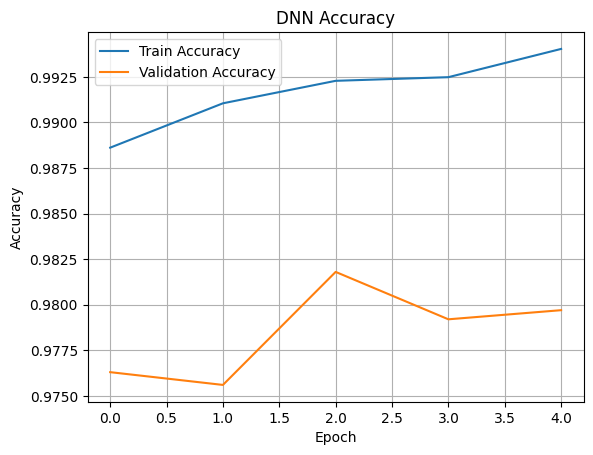

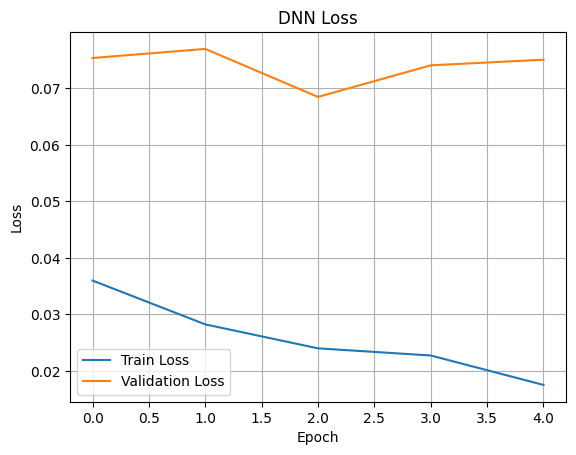

In [6]:
history = dnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
import matplotlib.pyplot as plt

# 정확도(accuracy) 그래프
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('DNN Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 손실(loss) 그래프
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('DNN Loss')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.8819 - loss: 0.3945 - val_accuracy: 0.9803 - val_loss: 0.0592
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9818 - loss: 0.0587 - val_accuracy: 0.9873 - val_loss: 0.0370
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9875 - loss: 0.0383 - val_accuracy: 0.9903 - val_loss: 0.0313
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.9913 - loss: 0.0268 - val_accuracy: 0.9890 - val_loss: 0.0320
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9946 - loss: 0.0180 - val_accuracy: 0.9897 - val_loss: 0.0363


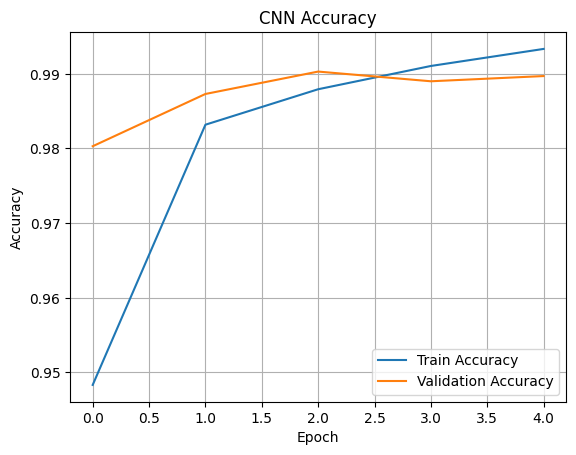

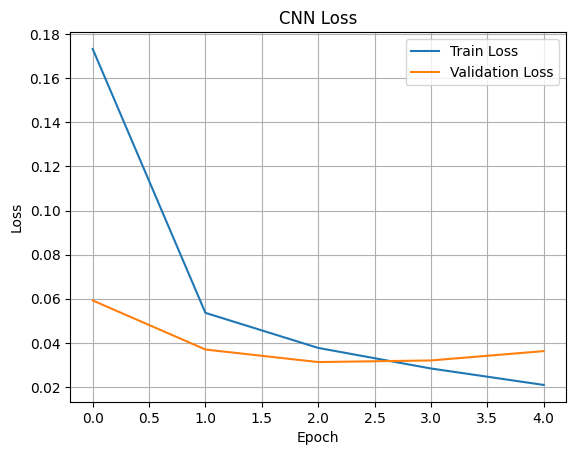

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9866 - loss: 0.0458
CNN Test Accuracy: 0.9897


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# CNN용 데이터 로딩
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 전처리: 정규화 + 채널 차원 추가
x_train = np.expand_dims(x_train / 255.0, -1)
x_test = np.expand_dims(x_test / 255.0, -1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델 구성
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 컴파일
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 학습 결과를 history로 저장 (시각화 위해 반드시 필요)
history = cnn_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# 정확도 그래프
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 손실 그래프
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 테스트 결과 출력
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")